# Pitone per analizzare tracce del rivelatore bete basato su acquisizione tramite schede audio
Inizio a partire da quanto mi ha spedito Erik

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

from scipy.optimize import curve_fit
from scipy.signal import find_peaks

import soundfile as sf                                                      

In questa cella definisco se voglio fare il plot dei picchi trovati (per controllo) e quanti campionamenti utilizzare per il plot. Nota: i picchi vengono comunque cercati su tutto il set di dati

In [2]:
plot = True
N = 1000000

Carico il file di dati, disponibili [qui](https://scarsi.web.cern.ch/INSULAB/fisicaModerna/betaAudacity/co60.flac). Il questo quaderno si può invece trovare  [qui](https://scarsi.web.cern.ch/INSULAB/fisicaModerna/betaAudacity/betaAudio.ipynb)

In [3]:
%%time
path = 'thorium_test_2.flac'                                                  
data, samplerate = sf.read(path)   
print(data.shape)

(1648017, 2)
CPU times: user 80.7 ms, sys: 13.4 ms, total: 94.1 ms
Wall time: 93.8 ms


Ottengo il vettore relativo ai dati. Non ho letto la documentazione in prima persona, ma mi fido che i dati siano nella seconda colonna

In [4]:
%%time
DATI = data[:,1]
DATI.shape
dati = np.abs(DATI)

#DATI = DATI[:1000000]

CPU times: user 1.37 ms, sys: 6.01 ms, total: 7.38 ms
Wall time: 5.76 ms


Inizio a plottare la wf, così per guardarla in faccia

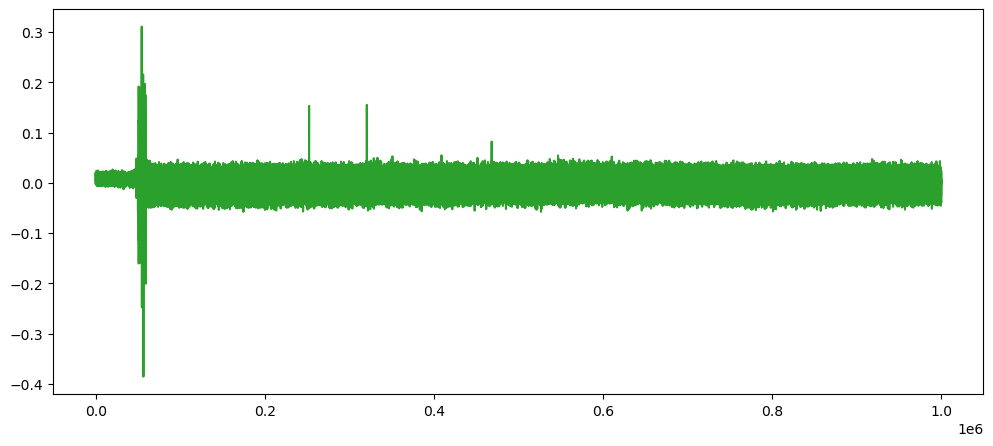

In [5]:
# %matplotlib qt
%matplotlib inline


fig, ax = plt.subplots()
fig.set_size_inches(12,5)

ax.plot(DATI[:N], c = "tab:green")

plt.show()

Visto che a noi interessa l'ampiezza, immagino che ne vada considerato il valore assoluto

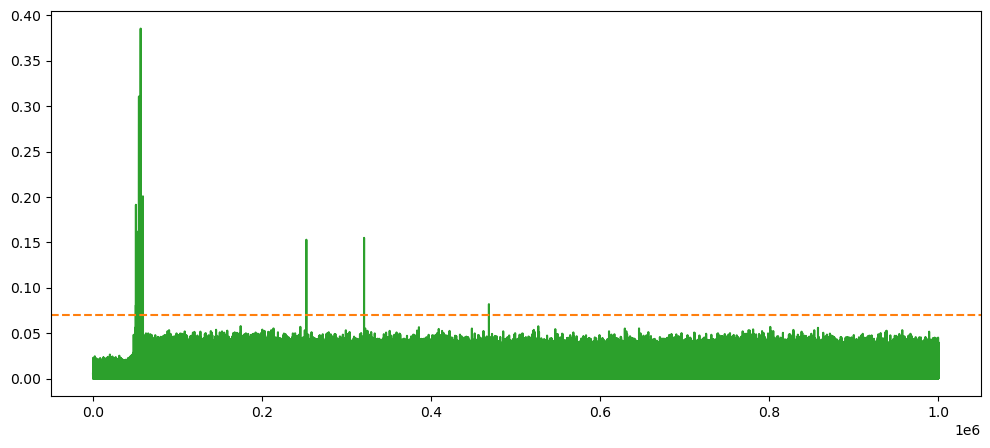

In [6]:
# qt per avere la finestra grafica
%matplotlib inline 

dati = np.abs(DATI) # Valore assoluto

fig, ax = plt.subplots()
fig.set_size_inches(12,5)

ax.plot(dati[:N], c = "tab:green")
ax.axhline(y = .07, ls = "--", c = "tab:orange")

plt.show()

# Inizio del mio lavoro
Noto che mettendo una soglia a 0.25 i picchi risultano ben al di sopra della baseline...  

## Ricerca dei picchi
Senza volermi troppo male, uso [find peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html). Per un riferimento con dei disegnini chiari, si veda la [documentazione di matlab per la medesima funzione](https://it.mathworks.com/help/signal/ref/findpeaks.html). Si tratta di una funzione molto comoda che permette di individuare picchi in un vettore, impostando se necessario vari parametri.

Vado dunque ad effettuare la ricerca dei picchi, e li disegno sopra alla wf originale, per assocurarmi della bontà del lavoro

I have found (19,) peaks


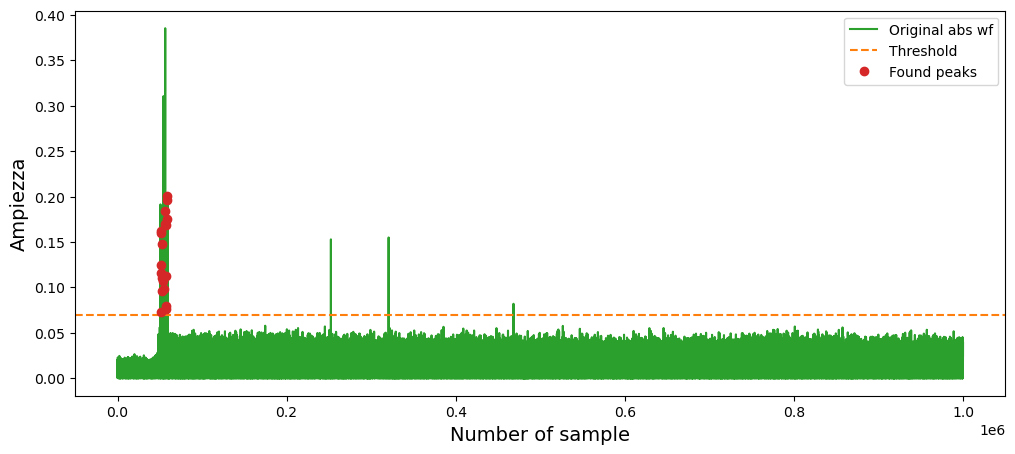

CPU times: user 305 ms, sys: 23.5 ms, total: 328 ms
Wall time: 328 ms


In [7]:
%%time
%matplotlib inline


# Settings - eventualmente provare a giocarci un po'
threshold = .07 # <-- Set threshold here
minWidth = 3 # <-- Set minimum width of a single peak
minDist = 50 # <-- Set minimum distance between two consecutive peaks

peaks, _ = find_peaks(dati, height = threshold, width = minWidth, distance = minDist) # <-- x dei picchi
print(f"I have found {peaks.shape} peaks")

PHvect = dati[peaks] # <-- y dei picchi = Pulse Height


# Plot
if plot:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,5)

    ax.plot(dati[:N], c = "tab:green", label = "Original abs wf")
    ax.axhline(y = threshold, ls = "--", c = "tab:orange", label = "Threshold")
    ax.plot(peaks[peaks<N], PHvect[peaks<N], ls = "", marker = "o", color = "tab:red", label = "Found peaks")

    ax.set_xlabel("Number of sample", fontsize = 14)
    ax.set_ylabel("Ampiezza", fontsize = 14)
    ax.set_title("", fontsize = 16)

    #ax.grid()
    ax.legend(loc = "upper right")

    plt.show()

## Istogramma delle PH
Vado ad effettuare e plottare l'istogramma delle Pulse Height. Nota: sembra che ci sia un po' di saturazione 

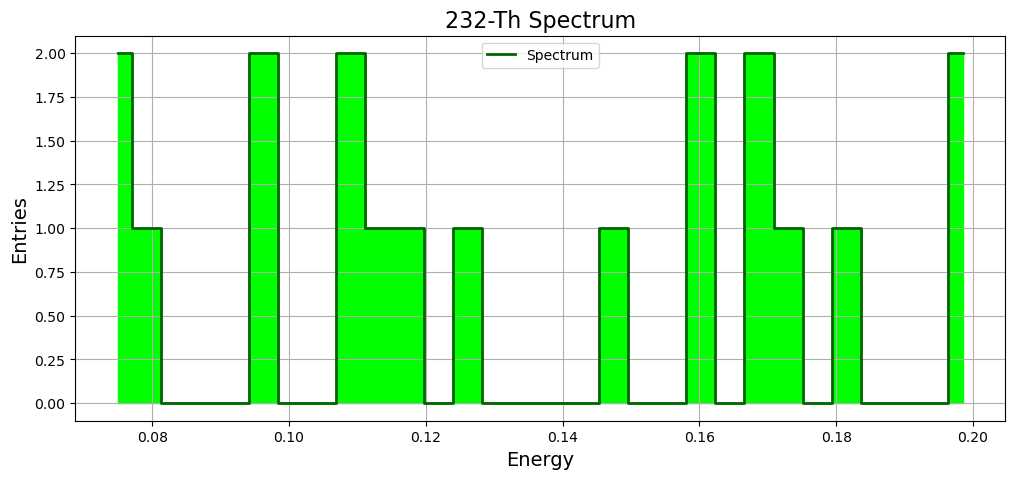

In [8]:
h, bins = np.histogram(PHvect, bins = 30)
binc = bins[:-1] + (bins[1]-bins[0])/2


fig, ax = plt.subplots()
fig.set_size_inches(12,5)

ax.plot(binc, h, ds = "steps-mid", c = "darkgreen", lw = 2, label = "Spectrum")
ax.fill_between(binc, h, step = "mid", color = "lime", alpha = 1)

#ax.plot(binc, myFun(binc, *popt))

ax.grid()
ax.set_xlabel("Energy", fontsize = 14)
ax.set_ylabel("Entries", fontsize = 14)
ax.set_title("232-Th Spectrum", fontsize = 16)
ax.legend()
#ax.set_yscale("log")

plt.show()

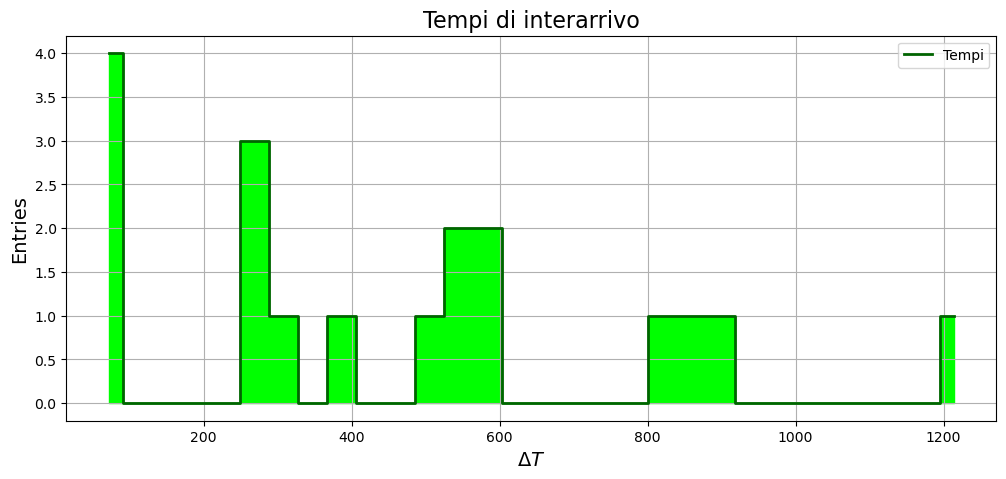

In [9]:
dt = np.diff(peaks)

h, bins = np.histogram(dt, bins = 30)
binc = bins[:-1] + (bins[1]-bins[0])/2


fig, ax = plt.subplots()
fig.set_size_inches(12,5)

ax.plot(binc, h, ds = "steps-mid", c = "darkgreen", lw = 2, label = "Tempi")
ax.fill_between(binc, h, step = "mid", color = "lime", alpha = 1)

#ax.plot(binc, myFun(binc, *popt))

ax.grid()
ax.set_xlabel("$\Delta T$", fontsize = 14)
ax.set_ylabel("Entries", fontsize = 14)
ax.set_title("Tempi di interarrivo", fontsize = 16)
ax.legend()
#ax.set_yscale("log")

plt.show()